In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the required libraries
from sklearn.preprocessing import minmax_scale

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/D2.csv')
df.isna().sum()

gender              0
age                 0
height              0
weight              0
blood_type          0
insurance           0
income              0
race                0
immigrant           0
smoking             0
alcohol             0
contacts_count      0
house_count         0
working             0
worried             0
covid19_positive    0
dtype: int64

In [ ]:
df

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive
0,male,30_40,174,64,bp,yes,med,white,native,never,3.0132,7.725594,2.0,never,4,1
1,male,30_40,182,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
2,male,30_40,184,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
3,female,70_80,164,72,unknown,yes,med,white,native,never,14.0000,7.725594,3.0,never,4,1
4,male,30_40,192,92,unknown,yes,med,white,native,never,0.0000,7.725594,1.0,never,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,male,40_50,174,72,unknown,yes,med,white,native,yesheavy,3.0132,5.000000,3.0,travel critical,5,0
6106,female,20_30,164,130,on,no,med,white,native,never,3.0132,21.000000,4.0,never,5,0
6107,female,20_30,162,56,bp,yes,low,mixed,native,vape,0.0000,10.000000,3.0,travel non critical,3,0
6108,female,40_50,158,70,bp,yes,med,asian,immigrant,quit5,3.0132,14.000000,1.0,travel critical,5,0


In [ ]:
df.dtypes

gender               object
age                  object
height                int64
weight                int64
blood_type           object
insurance            object
income               object
race                 object
immigrant            object
smoking              object
alcohol             float64
contacts_count      float64
house_count         float64
working              object
worried               int64
covid19_positive      int64
dtype: object

Creating a copy of df to compare the data after processing.

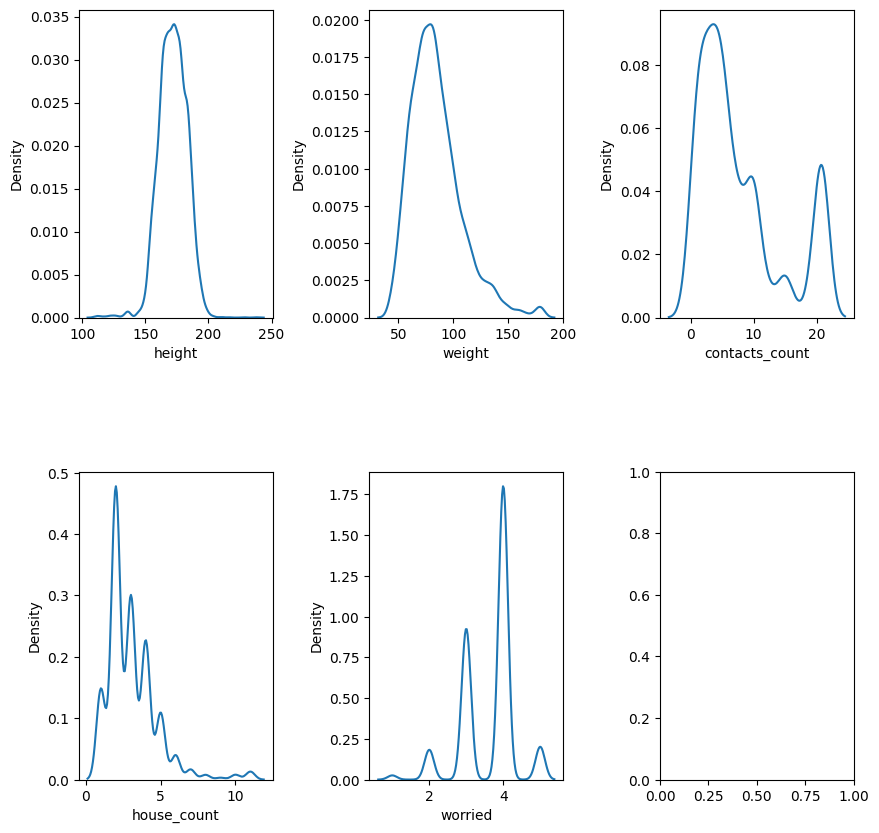

In [ ]:
# Visualising features
cols = ['height','weight','contacts_count','house_count','worried']

fig,ax = plt.subplots(2,3, figsize=(10,10),sharex=False)

for i, col in enumerate(cols):
  sns.kdeplot(df[col].dropna(),ax=ax[int(i/3)][i%3])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

In [ ]:
counts = df['worried'].unique()
#percentage = (counts / len(df)) * 100
print(counts)

[4 3 2 5 1]


In [ ]:
# Convert gender values to numerical data type and convert data type
gender_map = {'male':0,'female':1,'other':0.5}
df["gender_n"] = df['gender'].apply(lambda x: gender_map[x])

df['gender_n'] = df['gender_n'].astype(int)


# Convert age from intrevel to continuous scale
def find_midpoint(age_range):
    lower, upper = age_range.split('_')
    return (int(lower) + int(upper)) / 2

df['age_n'] = df['age'].apply(find_midpoint)
df['age_n'] = df['age_n'].round().astype(int)


# Convert insurance to boolean type
insurance_map = {'no':0,'yes':1}
df["insurance_n"] = df['insurance'].apply(lambda x: insurance_map[x])

# Convert income values to numerical type
income_map = {'gov':0,'low':1,'med':2,'high':3}
df["income_n"] = df['income'].apply(lambda x: income_map[x])

# Rounding contacts_counts and converting to integer type.
df['contacts_count'] = df['contacts_count'].round().astype(int)

# Rounding alcohol and converting to integer type.
df['alcohol'] = df['alcohol'].round().astype(int)

# Rounding house_count and converting to integer type.
df['house_count'] = df['house_count'].round().astype(int)

df

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive,gender_n,age_n,insurance_n,income_n
0,male,30_40,174,64,bp,yes,med,white,native,never,3,8,2,never,4,1,0,35,1,2
1,male,30_40,182,118,unknown,yes,med,white,native,never,0,8,3,never,4,1,0,35,1,2
2,male,30_40,184,118,unknown,yes,med,white,native,never,0,8,3,never,4,1,0,35,1,2
3,female,70_80,164,72,unknown,yes,med,white,native,never,14,8,3,never,4,1,1,75,1,2
4,male,30_40,192,92,unknown,yes,med,white,native,never,0,8,1,never,4,1,0,35,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,male,40_50,174,72,unknown,yes,med,white,native,yesheavy,3,5,3,travel critical,5,0,0,45,1,2
6106,female,20_30,164,130,on,no,med,white,native,never,3,21,4,never,5,0,1,25,0,2
6107,female,20_30,162,56,bp,yes,low,mixed,native,vape,0,10,3,travel non critical,3,0,1,25,1,1
6108,female,40_50,158,70,bp,yes,med,asian,immigrant,quit5,3,14,1,travel critical,5,0,1,45,1,2


1. Dropping blood_type because a significant amount (33%) of data is missing and hence, it dosent provide any value to the analysis.

2. One Hot Encode Nominal variables such as race, immigrant, smoking, working

3. Scale numerical features appropriately

In [ ]:
df_n = df.copy()

# Dropping blood_type
df_n = df_n.drop('blood_type', axis=1)

# Condensing Smoking category to represent the values with more clarity
smoking_map = {
    'never':'non_smoker',
    'quit0': 'quit', 
    'quit5': 'quit', 
    'quit10': 'quit',
    'yeslight': 'smoker',
    'yesmedium': 'smoker',
    'yesheavy': 'smoker',
    'vape':'vaper'
}

df_n["smoking"] = df_n['smoking'].apply(lambda x: smoking_map[x])

# One-hot-encod nominal variables
selected_features = ['race', 'immigrant', 'smoking', 'working']
df_n = pd.get_dummies(df_n, columns=selected_features, drop_first=True)

df_n = df_n[['gender_n', 'age_n','height', 'weight', 'insurance_n', 'income_n', 'race_black',
       'race_hispanic', 'race_mixed', 'race_other', 'race_white',
       'immigrant_native', 'smoking_quit', 'smoking_smoker', 'smoking_vaper',
       'working_never','alcohol',
       'contacts_count', 'house_count', 'worried','working_never', 'working_stopped', 'working_travel critical',
       'working_travel non critical','covid19_positive']]

df_n

,gender_n,age_n,height,weight,insurance_n,income_n,race_black,race_hispanic,race_mixed,race_other,...,working_never,alcohol,contacts_count,house_count,worried,working_never,working_stopped,working_travel critical,working_travel non critical,covid19_positive
0,0,35,174,64,1,2,0,0,0,0,...,1,3,8,2,4,1,0,0,0,1
1,0,35,182,118,1,2,0,0,0,0,...,1,0,8,3,4,1,0,0,0,1
2,0,35,184,118,1,2,0,0,0,0,...,1,0,8,3,4,1,0,0,0,1
3,1,75,164,72,1,2,0,0,0,0,...,1,14,8,3,4,1,0,0,0,1
4,0,35,192,92,1,2,0,0,0,0,...,1,0,8,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,0,45,174,72,1,2,0,0,0,0,...,0,3,5,3,5,0,0,1,0,0
6106,1,25,164,130,0,2,0,0,0,0,...,1,3,21,4,5,1,0,0,0,0
6107,1,25,162,56,1,1,0,0,1,0,...,0,0,10,3,3,0,0,0,1,0
6108,1,45,158,70,1,2,0,0,0,0,...,0,3,14,1,5,0,0,1,0,0


In [ ]:
df_n

,gender_n,age_n,height,weight,insurance_n,income_n,race_black,race_hispanic,race_mixed,race_other,...,working_never,alcohol,contacts_count,house_count,worried,working_never,working_stopped,working_travel critical,working_travel non critical,covid19_positive
0,0,35,174,64,1,2,0,0,0,0,...,1,3,8,2,4,1,0,0,0,1
1,0,35,182,118,1,2,0,0,0,0,...,1,0,8,3,4,1,0,0,0,1
2,0,35,184,118,1,2,0,0,0,0,...,1,0,8,3,4,1,0,0,0,1
3,1,75,164,72,1,2,0,0,0,0,...,1,14,8,3,4,1,0,0,0,1
4,0,35,192,92,1,2,0,0,0,0,...,1,0,8,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,0,45,174,72,1,2,0,0,0,0,...,0,3,5,3,5,0,0,1,0,0
6106,1,25,164,130,0,2,0,0,0,0,...,1,3,21,4,5,1,0,0,0,0
6107,1,25,162,56,1,1,0,0,1,0,...,0,0,10,3,3,0,0,0,1,0
6108,1,45,158,70,1,2,0,0,0,0,...,0,3,14,1,5,0,0,1,0,0


In [ ]:
# Independent variables data - start with all options
X_data = df_n[['gender_n', 'age_n','height', 'weight', 'insurance_n', 'income_n', 'race_black',
       'race_hispanic', 'race_mixed', 'race_other', 'race_white',
       'immigrant_native', 'smoking_quit', 'smoking_smoker', 'smoking_vaper',
       'working_never','alcohol',
       'contacts_count', 'house_count', 'worried','working_never', 'working_stopped', 'working_travel critical',
       'working_travel non critical',]] 

# Dependent variable data
y_data = df_n['covid19_positive'] # convert to True False 

X_mat = X_data.to_numpy()

In [ ]:
# Break the current dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_data, shuffle=True, train_size=0.8, random_state=99) # Train size determines the perceptage use for training the model
# Check the type of X_train

X_train

array([[  0,  25, 174, ...,   0,   1,   0],
       [  1,  45, 150, ...,   1,   0,   0],
       [  1,  65, 168, ...,   0,   0,   0],
       ...,
       [  0,  85, 190, ...,   0,   0,   0],
       [  0,  75, 172, ...,   1,   0,   0],
       [  0,  55, 184, ...,   1,   0,   0]])

In [ ]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Visualize min, max, mean, and standard deviation of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".format(
        i, min(col), max(col), np.mean(col), np.std(col)))

# Learn the mean and std.dev of variables from training data
# Then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".format(
        i, min(col), max(col), np.mean(col), np.std(col)))

# Use the statistics learned from training to transform test data
# NEVER learn from test data; this is supposed to be a set of data that the model has never seen before
X_test = scaler.transform(X_test)


Before scaling
-------------
Variable #0: min 0, max 1, mean 0.48 and std dev 0.50
Variable #1: min 5, max 105, mean 46.23 and std dev 17.82
Variable #2: min 110, max 238, mean 171.84 and std dev 10.92
Variable #3: min 44, max 180, mean 84.48 and std dev 23.40
Variable #4: min 0, max 1, mean 0.89 and std dev 0.31
After scaling
-------------
Variable #0: min -0.9614621411261537, max 1.0400825547105752, mean 0.00 and std dev 1.00
Variable #1: min -2.313879705117581, max 3.298309050211519, mean 0.00 and std dev 1.00
Variable #2: min -5.662168176305278, max 6.05755601751586, mean 0.00 and std dev 1.00
Variable #3: min -1.7303402736583962, max 4.082357907347944, mean -0.00 and std dev 1.00
Variable #4: min -2.8316868090419955, max 0.3531463991027985, mean 0.00 and std dev 1.00


In [ ]:
rs = 10
model = LogisticRegression(random_state=rs)
# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [ ]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6601882160392799
Test accuracy: 0.6505728314238952
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       719
           1       0.60      0.45      0.51       503

    accuracy                           0.65      1222
   macro avg       0.64      0.62      0.62      1222
weighted avg       0.64      0.65      0.64      1222



Printing out the weights

In [ ]:

print(model.coef_)

[[-0.08054818 -0.05683466 -0.26999458  0.26550004  0.15741492 -0.44791874
   0.00989271  0.08751874  0.03925644  0.01093003  0.11466263  0.16865354
   0.05546277  0.09145511  0.04486951  0.05940182  0.05940182  0.03366369
  -0.07089149  0.24220788  0.13088772  0.05940182  0.05940182  0.15889358
   0.41774634  0.03193516]]


In [ ]:
# Display the features used in default model with their weights

feature_names = X_data.columns
coef = model.coef_[0]
print("Features and their respective weights\n")
for i in range(len(coef)):
  print(feature_names[i], ':', coef[i])

Features and their respective weights

gender_n : -0.08054818166808123
age_n : -0.05683466239886943
height : -0.26999458436973983
weight : 0.26550004345785255
insurance_n : 0.15741492106223884
income_n : -0.44791874378415436
race_black : 0.009892714253103665
race_hispanic : 0.08751874181961886
race_mixed : 0.039256436204866574
race_other : 0.01093003131125503
race_white : 0.11466262743437852
immigrant_native : 0.1686535414954417
smoking_quit : 0.05546277071527871
smoking_smoker : 0.09145510513366195
smoking_vaper : 0.044869510193734446
working_never : 0.05940182170815586
working_never : 0.05940182170815586
alcohol : 0.03366368890471103
contacts_count : -0.07089149362714149
house_count : 0.2422078812527921
worried : 0.13088772109780109
working_never : 0.05940182170815586
working_never : 0.05940182170815586
working_stopped : 0.15889358202641848
working_travel critical : 0.4177463444263217
working_travel non critical : 0.03193515862455159


Performing Regression using GridSearchCV

In [ ]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [ ]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.01741786, 0.01988089, 0.01383338, 0.01349258, 0.01843371,
       0.02015724, 0.02365582, 0.02097914, 0.01950722, 0.02180209]), 'std_fit_time': array([0.00352709, 0.00390044, 0.00190968, 0.00287682, 0.00295307,
       0.00202724, 0.00581606, 0.00262269, 0.00066172, 0.00287636]), 'mean_score_time': array([0.00194232, 0.00325692, 0.00171523, 0.001598  , 0.00160615,
       0.00160851, 0.00185366, 0.00175502, 0.00167258, 0.00177443]), 'std_score_time': array([4.46361162e-04, 2.36465972e-03, 1.47855616e-04, 8.74926184e-05,
       7.75581208e-05, 6.85396151e-05, 1.85885834e-04, 1.00077797e-04,
       6.80354100e-05, 1.48694053e-04]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C

Total number of models:  10


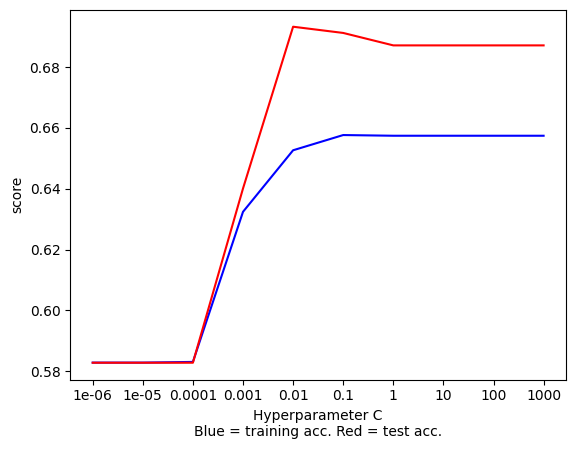

In [ ]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


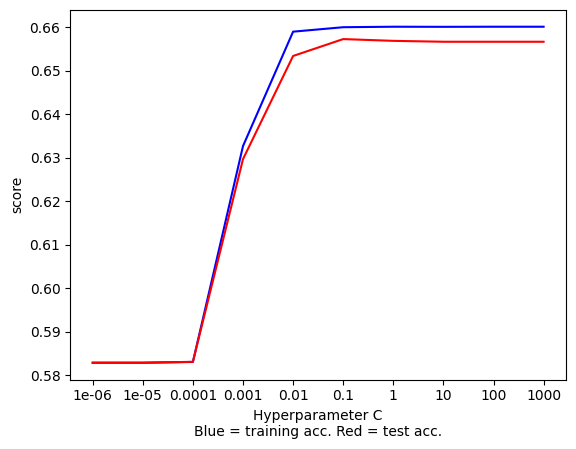

In [ ]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [ ]:
print(cv.best_params_)

{'C': 0.1}


In [ ]:
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.6601882160392799
Test accuracy: 0.6497545008183306


In [ ]:
def analyse_feature_importance(dm_model, feature_names, n_to_display):
    # retrieve the coefficients from the model
    coefficients = dm_model.coef_[0]

    # create a list of tuples with feature names and coefficients
    feature_importance = list(zip(feature_names, coefficients))

    # sort the feature importance list based on absolute coefficient values
    feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

    # display the top n features
    for feature, importance in feature_importance[:n_to_display]:
        print(f"{feature} : {importance}")

In [ ]:
# Display the important features
n_to_display = 5
print("Feature Importances\n ")
analyse_feature_importance(model, X_data.columns,n_to_display)

Feature Importances
 
income_n : -0.44791874378415436
working_travel critical : 0.4177463444263217
height : -0.26999458436973983
weight : 0.26550004345785255
house_count : 0.2422078812527921


In [ ]:
from sklearn.feature_selection import SelectFromModel

# Assuming `dt_best.best_estimator_` is your best decision tree model

# Create a SelectFromModel object using your best estimator
selector = SelectFromModel(dt_best.best_estimator_, prefit=True)

# Get the mask of selected features
feature_mask = selector.get_support()

# Get the list of selected feature indices
selected_feature_indices = np.where(feature_mask)[0]

#print("Selected Feature Indices:", selected_feature_indices)

feature_mask


NameError: ignored

In [ ]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

In [ ]:
print(X_train_sel_model)

In [ ]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

# test the best model
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv_sel_model.best_params_)

Feature selection using Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 26
Number of features after elimination 17


In [ ]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [ ]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.6601882160392799
Test accuracy: 0.6456628477905073
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       719
           1       0.59      0.45      0.51       503

    accuracy                           0.65      1222
   macro avg       0.63      0.62      0.62      1222
weighted avg       0.64      0.65      0.64      1222

{'C': 0.1}


In [ ]:
rfe_result_set = rfe_cv.cv_results_
rfe_result_set

{'mean_fit_time': array([0.01536195, 0.0136935 , 0.01272972, 0.01089399, 0.01604404,
        0.01411262, 0.01471989, 0.01397281, 0.01377683, 0.01479447]),
 'std_fit_time': array([0.0017839 , 0.00144198, 0.00182988, 0.00041939, 0.00703385,
        0.00174537, 0.00207015, 0.00124063, 0.00096469, 0.00297646]),
 'mean_score_time': array([0.00220835, 0.00167456, 0.0015835 , 0.00149374, 0.00184929,
        0.0016403 , 0.00159905, 0.00164146, 0.00172036, 0.00173652]),
 'std_score_time': array([1.50341882e-03, 1.14764224e-04, 6.18949555e-05, 3.01918890e-05,
        4.71807071e-04, 7.88716948e-05, 7.10590926e-05, 7.98766148e-05,
        2.91291348e-04, 3.53686007e-04]),
 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                    1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-06},
  {'C': 1e-05},
  {'C': 0.0001}

Total number of models:  10


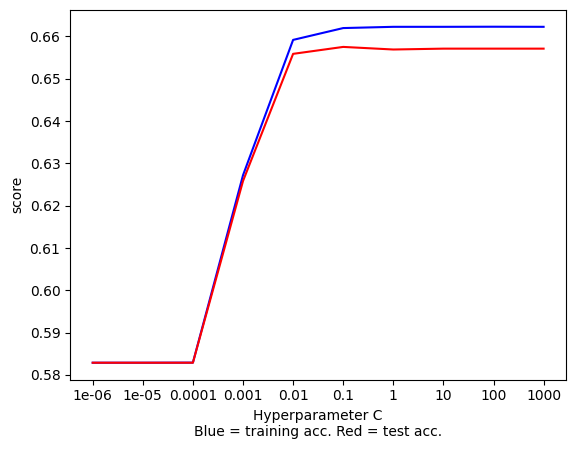

In [ ]:
import matplotlib.pyplot as plt
train_result = rfe_result_set['mean_train_score']
test_result = rfe_result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Feature Importance

In [ ]:
def analyse_feature_importance(dm_model, feature_names, n_to_display):
    # retrieve the coefficients from the best estimator of the GridSearchCV
    coefficients = dm_model.best_estimator_.coef_[0]

    # create a list of tuples with feature names and coefficients
    feature_importance = list(zip(feature_names, coefficients))

    # sort the feature importance list by absolute coefficient values in descending order
    feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

    # display the top n features with their coefficients
    for feature, coef in feature_importance[:n_to_display]:
        print(f"{feature}: {coef}")

In [ ]:
# Display the important features
n_to_display = 20
print("Feature Importances\n ")
analyse_feature_importance(rfe_cv, X_data.columns,n_to_display)

Feature Importances
 
insurance_n: -0.4553909547650477
working_never: 0.38746188818768373
height: 0.2613462087229955
age_n: -0.25242682209923545
smoking_quit: 0.2407257299746467
race_hispanic: 0.1741978508132301
weight: 0.15519485939522576
smoking_smoker: 0.13180308718795533
working_never: 0.13082785270256755
race_mixed: 0.08130752293696954
race_black: 0.07293619030590477
gender_n: -0.07042072431109656
race_other: 0.06466708030125799
race_white: 0.06466708030125799
smoking_vaper: 0.06466708030125799
income_n: 0.06369116220561409
immigrant_native: -0.05844326414010925


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])


print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)

ROC index on test for `model`: 0.7024749970275703
ROC index on test for `cv`: 0.7028123332328697
ROC index on test for `rfe_cv`: 0.7029091100130787


In [ ]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])


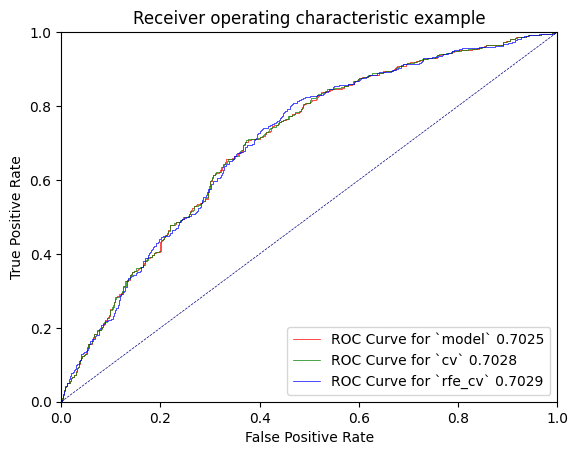

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.4f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.4f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.4f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)



plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Assuming X_test is your test set and feature_names is the list of your feature names
df_test = pd.DataFrame(X_test_sel, columns=feature_names)

# Get boolean mask for COVID positive individuals
positive_mask = probabilities > threshold

# Filter the DataFrame for only COVID positive individuals
positive_individuals = df_test[positive_mask]

# Now, you can apply mean() or mode() functions
average_characteristics = positive_individuals.mean()


In [ ]:
# Assuming `features` is a list of features that your model was trained on
df_test = pd.DataFrame(X_test, columns=feature_names)

# Then predict probabilities with your model
probabilities = rfe_cv.predict_proba(X_test_sel)[:, 1]
probabilities

In [ ]:
# Assuming `threshold` is your chosen threshold
threshold = 0.6
positive_individuals = X_test_sel[probabilities > threshold]
positive_individuals

In [ ]:
average_characteristics = positive_individuals.mean()
average_characteristics


